In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np


In [3]:
New_df = pd.read_csv("assets/datasets/processed_data_noSClaing.csv")


In [4]:
features = ['Leaf wetness probability_mean_filled','Relative Humidity_max', 
            'Soil Moisture_mean', 'Soil Temperature_mean', 'Sunshine Duration_mean',
            'state','district', 'subdistrict', 'crop', 
            'month']

In [5]:
# Splitting 
X = New_df[features]
y = New_df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
!pip install imbalanced-learn


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:

from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(objective='multi:softmax', num_class=10,
        learning_rate=0.0005,
        max_depth=8,
        n_estimators=400,
        subsample=0.8,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    ))
])

pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.40186547556489755

Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.46      0.29       294
           1       0.38      0.50      0.43       353
           2       0.31      0.45      0.37       331
           3       0.51      0.18      0.26      1399
           4       0.45      0.64      0.53       699
           5       0.35      0.65      0.46       930
           6       0.65      0.30      0.41       819
           7       0.58      0.41      0.48      1485
           8       0.23      0.37      0.28       292
           9       0.37      0.33      0.35      1010

    accuracy                           0.40      7612
   macro avg       0.40      0.43      0.39      7612
weighted avg       0.46      0.40      0.39      7612



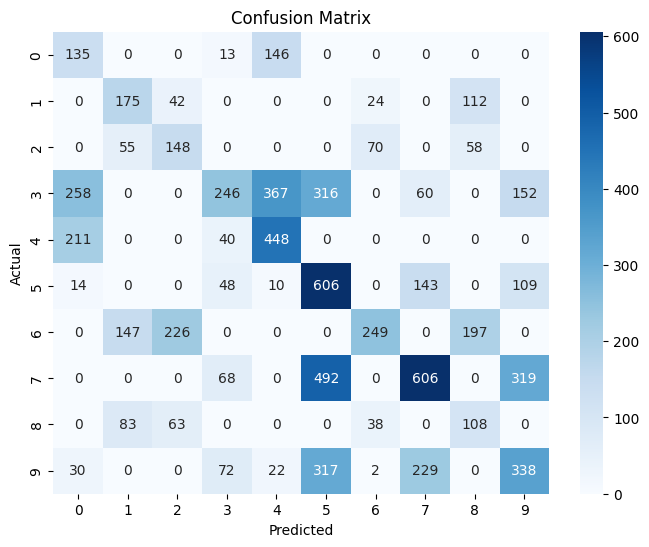

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
#import joblib
#joblib.dump(pipeline, "assets/models/xgb_smote_pipeline.pkl")

In [10]:
#Without SMOTE

pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(objective='multi:softmax', num_class=10,
        learning_rate=0.0005,
        max_depth=8,
        n_estimators=400,
        subsample=0.8,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
        

    ))
])

pipeline2.fit(X_train, y_train)

# Predict
y_pred2 = pipeline2.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))

Accuracy: 0.45401996847083553

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.02      0.03       294
           1       0.41      0.42      0.41       353
           2       0.33      0.02      0.05       331
           3       0.47      0.50      0.49      1399
           4       0.48      0.59      0.53       699
           5       0.38      0.44      0.40       930
           6       0.50      0.82      0.62       819
           7       0.47      0.62      0.53      1485
           8       0.29      0.07      0.11       292
           9       0.41      0.16      0.23      1010

    accuracy                           0.45      7612
   macro avg       0.41      0.37      0.34      7612
weighted avg       0.43      0.45      0.41      7612



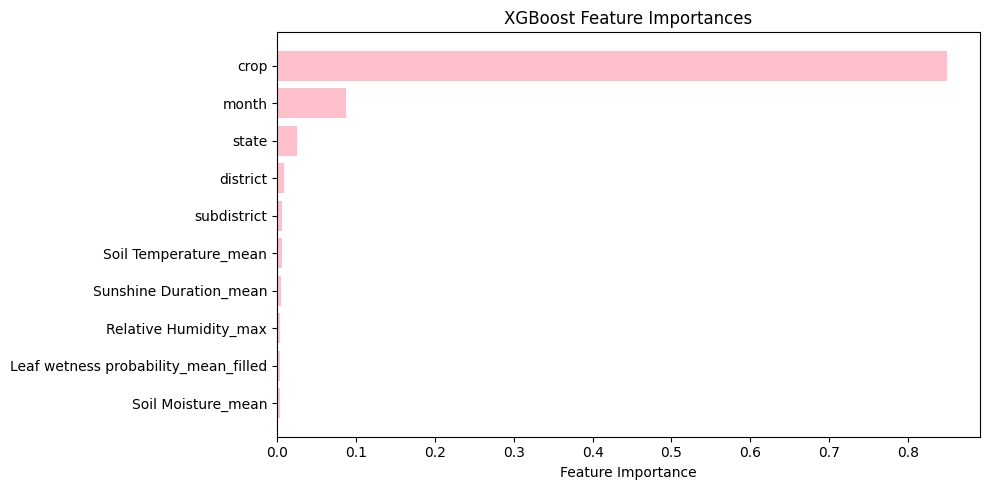

In [11]:
import matplotlib.pyplot as plt

xgb_model = pipeline.named_steps['classifier']

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='pink')
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [12]:
New_df['predicted_pest'] = pipeline.predict(New_df[features])
New_df = New_df[New_df['predicted_pest'] == New_df['target']]
New_df

#New_df[(New_df['target'] == 8) & (New_df['state']==1)] .head(100)

,row_index,Leaf wetness probability_mean_filled,Relative Humidity_max,Soil Moisture_mean,Soil Temperature_mean,Sunshine Duration_mean,state,district,subdistrict,crop,month,target,predicted_pest
0,1.0,17.385738,72.739670,0.286917,31.440296,30.091097,0,4.541209,4.381941,1,6,1,1
2,3.0,0.163749,61.508752,0.266179,35.209524,26.622719,0,5.658982,4.849062,1,6,2,2
4,5.0,8.507470,60.066203,0.128673,37.879463,24.273178,0,3.818605,3.361557,2,6,0,0
8,9.0,0.763539,66.022222,0.205429,34.463570,28.013770,0,4.737430,5.128788,2,6,3,3
9,10.0,0.052521,84.172833,0.188488,31.328335,27.656860,0,3.693559,2.871865,2,6,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38041,38042.0,5.469433,88.358987,0.234597,23.674443,26.879130,1,5.754331,5.344068,2,11,4,4
38044,38045.0,5.275012,83.207963,0.217153,25.607915,22.908144,0,4.821138,5.338703,2,11,4,4
38049,38050.0,6.169180,86.415045,0.289125,24.289167,25.840921,0,5.780534,5.797725,0,11,7,7
38051,38052.0,6.033997,80.328569,0.218368,26.206319,20.080135,0,5.780534,4.430851,0,11,7,7
